In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [14]:
import datetime as dt
from dateutil.relativedelta import relativedelta

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [16]:
#Station Columns
inspector = inspect(engine)
columnsStation = inspector.get_columns("station")
for col in columnsStation:
    print(col["name"])

id
station
name
latitude
longitude
elevation


In [17]:
#Measurement Columns
inspector = inspect(engine)
columnsMeasurement = inspector.get_columns("measurement")
for col in columnsMeasurement:
    print(col["name"])

id
station
date
prcp
tobs


Exploratory Climate Analysis

(2724, 'USC00519397', '2017-08-23', 0.0, 81.0)
(7635, 'USC00514830', '2017-08-23', 0.0, 82.0)
(12187, 'USC00519523', '2017-08-23', 0.08, 82.0)
(19550, 'USC00516128', '2017-08-23', 0.45, 76.0)
(2723, 'USC00519397', '2017-08-22', 0.0, 82.0)
(12186, 'USC00519523', '2017-08-22', 0.0, 82.0)
(19549, 'USC00516128', '2017-08-22', 0.5, 76.0)
(2722, 'USC00519397', '2017-08-21', 0.0, 81.0)
(7634, 'USC00514830', '2017-08-21', 0.02, 79.0)
(12185, 'USC00519523', '2017-08-21', None, 82.0)
2016-08-23
('2017-08-23', 0.0)
('2017-08-23', 0.0)
('2017-08-23', 0.08)
('2017-08-23', 0.45)
('2017-08-22', 0.0)
('2017-08-22', 0.0)
('2017-08-22', 0.5)
('2017-08-21', 0.0)
('2017-08-21', 0.02)
('2017-08-21', None)
('2017-08-21', 0.56)
('2017-08-20', 0.0)
('2017-08-20', 0.01)
('2017-08-20', None)
('2017-08-19', 0.0)
('2017-08-19', 0.0)
('2017-08-19', None)
('2017-08-19', 0.09)
('2017-08-18', 0.0)
('2017-08-18', 0.0)
('2017-08-18', 0.06)
('2017-08-18', None)
('2017-08-17', 0.0)
('2017-08-17', 0.05)
('2017-08-17', 0.0

('2017-01-07', 0.0)
('2017-01-06', 0.0)
('2017-01-06', 0.0)
('2017-01-06', 0.59)
('2017-01-06', 0.01)
('2017-01-06', 0.1)
('2017-01-06', 0.1)
('2017-01-05', 0.0)
('2017-01-05', 0.0)
('2017-01-05', 0.0)
('2017-01-05', 0.42)
('2017-01-05', 0.06)
('2017-01-05', 0.47)
('2017-01-04', 0.0)
('2017-01-04', 0.0)
('2017-01-04', 0.0)
('2017-01-04', 0.18)
('2017-01-04', 0.0)
('2017-01-04', 0.0)
('2017-01-03', 0.0)
('2017-01-03', 0.0)
('2017-01-03', 0.0)
('2017-01-03', None)
('2017-01-03', 0.0)
('2017-01-03', 0.0)
('2017-01-02', 0.0)
('2017-01-02', 0.0)
('2017-01-02', 0.01)
('2017-01-02', 0.01)
('2017-01-02', 0.0)
('2017-01-01', 0.0)
('2017-01-01', 0.29)
('2017-01-01', 0.0)
('2017-01-01', None)
('2017-01-01', 0.03)
('2017-01-01', 0.03)
('2016-12-31', 0.01)
('2016-12-31', 0.62)
('2016-12-31', 0.36)
('2016-12-31', 0.25)
('2016-12-31', 0.9)
('2016-12-30', 0.12)
('2016-12-30', 0.21)
('2016-12-30', 0.29)
('2016-12-30', None)
('2016-12-30', 0.07)
('2016-12-30', 0.29)
('2016-12-30', 2.37)
('2016-12-29', 0

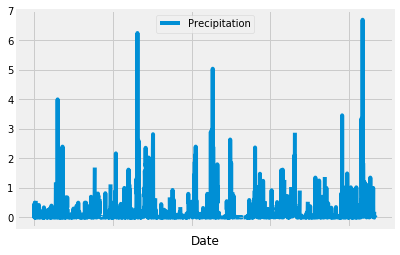

,Date,Precipitation
0,2017-08-23,0.00
3,2017-08-23,0.45
1,2017-08-23,0.00
2,2017-08-23,0.08
5,2017-08-22,0.00


In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
AllMeasurementData = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    filter(Measurement.date > "2016-08-31").\
    order_by(Measurement.date.desc()).limit(10).all()
for data in AllMeasurementData:
    print(data)

# Calculate the date 1 year ago from the last data point in the database
# maxDate = session.query(func.max(Measurement.date)).all()
# yearAgo = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# print(yearAgo)
maxDate = session.query(func.max(Measurement.date)).all()
mDate = maxDate[0][0]
d = dt.datetime.strptime(mDate, '%Y-%m-%d').date()
yearAgo = ((d - relativedelta(years=1)).strftime('%Y-%m-%d'))
print(yearAgo)

# Perform a query to retrieve the data and precipitation scores
DateandPrcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > "2016-08-31").\
    order_by(Measurement.date.desc()).all()
for data in DateandPrcp:
    print(data)

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(DateandPrcp, columns = ["Date", "Precipitation"])
prcp_df.set_index("Date")

# Sort the dataframe by date
p_df = prcp_df.sort_values(by=["Date"], ascending = False)

# Use Pandas Plotting with Matplotlib to plot the data
chart = p_df.plot(x="Date", y="Precipitation")
plt.xlabel("Date")
chart.legend(loc='upper center')
plt.show()

p_df.head()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
p_df.describe()

,Precipitation
count,1968.000000
mean,0.171479
std,0.451817
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station).count()

9

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).first()

(54.0, 85.0, 71.66378066378067)

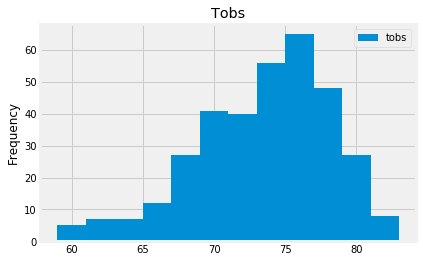

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#Find the station with the most observations
mostObservations = session.query(Measurement.station).group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).first()

#Filter for last 12 months of data for station with most observations
MaxTobs = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == mostObservations[0]).\
    filter(Measurement.date > "2016-08-31").all()

#Put data into dataframe and plot it
maxTobs_df = pd.DataFrame(MaxTobs, columns = ["Station", "Tobs"])
maxTobs_df.set_index("Station")
maxTobs_df.hist(column="Tobs", bins = 12)
plt.ylabel("Frequency")
plt.legend(["tobs"], loc = "upper right")
plt.show()

In [24]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [25]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip = calc_temps("2011-02-28", "2011-03-05")
print(trip)

[(61.0, 69.75510204081633, 75.0)]


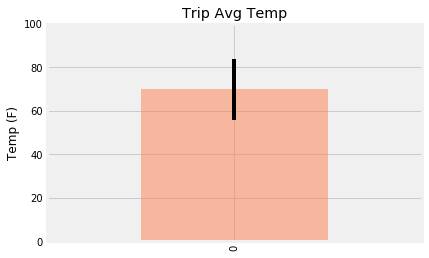

In [26]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
peak = trip[0][2] - trip[0][0]
trip_df = pd.DataFrame(trip, columns = ["TMIN", "TAVG", "TMAX"])
trip_df
trip_df.plot.bar(y = "TAVG", yerr= peak, color = "coral", alpha = 0.5, ylim = (0,100), legend = "")
plt.ylabel("Temp (F)")
plt.title("Trip Avg Temp")
plt.show()

In [27]:
joining = session.query(Measurement, Station).filter(Measurement.station == Station.station).limit(10).all()


In [28]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

join_tables = session.query(Station.station, Station.name, Station.latitude,
              Station.longitude, Station.elevation, func.sum(Measurement.prcp)).group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).desc()).filter(Measurement.station == Station.station).\
    filter(Measurement.date >= "2011-02-28").filter(Measurement.date <= "2011-03-05").all()
print(join_tables)

[('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 2.33), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 2.23), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 2.19), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 1.96), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 1.45), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.44), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 1.38), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.63), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]
